In [7]:
#pip3 install wheel
#pip3 install pandas
#!pip3 install requests
#!pip3 install seaborn
import pandas as pd
import requests
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 999

#!pip3 install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [8]:
# find out total number of pages
i = 5
url = 'https://api.ergoplatform.com/api/v1/tokens?limit=500&offset=' + str(i)
r = requests.get(url)
json = r.json()
total_record = int(json['total'])
print("Total record: " +str(total_record))

# results will be appended to this list
all_items = []

for offset in range(0,total_record,500):
    url = "https://api.ergoplatform.com/api/v1/tokens?limit=500&offset="+str(offset)              
    r = requests.get(url)      
    json = r.json() 
    all_items.append(json)        
    print(offset)

Total record: 65656
0
500
1000


KeyboardInterrupt: 

In [ ]:
from pandas import json_normalize
import json

# normalise the data
df = json_normalize(all_items,"items",['items'])

# drop unwanted columns 
df = df.drop(['emissionAmount', 'type', 'decimals', 'boxId', 'items' ],axis =1)

# keep only stake-keys
df = df[df.name.str.contains("ergopad Stake Key").fillna(False)]

# for investigating parsing errors 
# df.to_csv("to_fix.csv", index=False)

df.head()


,id,name,description
44,568baae2b650babc731c466ff8a92bfb68e483209cab3c...,ergopad Stake Key,"{""originalAmountStaked"": 8161.87, ""stakeTime"":..."
51,7f4039e64cb0562174dbd23f8073823eb04446ec37a91f...,ergopad Stake Key,"{""originalAmountStaked"": 124.0, ""stakeTime"": ""..."
52,bab3a860046627f90c487aefa9c34c693332a510f50c12...,ergopad Stake Key,"{""originalAmountStaked"": 126.16, ""stakeTime"": ..."
53,1814b1292acc057afdacc58330fa0f4ae77b7395eb49a9...,ergopad Stake Key,"{""originalAmountStaked"": 58.79, ""stakeTime"": ""..."
54,ad451df3dfcd1d31d080af0dc0ae58a918231c34556399...,ergopad Stake Key,"{""originalAmountStaked"": 657.72, ""stakeTime"": ..."


In [ ]:
#df = pd.read_csv("to_fix.csv")

# drop 5 problematic rows at end with different format
df.drop(df.tail(5).index,inplace=True)

# Map JSON in 'description' column to new columns
df[['originalAmountStaked','stakeTime']]=df['description'].map(eval).apply(pd.Series)

# Drop unwanted column
df = df.drop(['description' ],axis =1)

# How many stake keys do we have? 
df.count()


id                      1243
name                    1243
originalAmountStaked    1243
stakeTime               1243
dtype: int64

In [ ]:
#pd.reset_option('all')

In [ ]:
# sort by amount staked
df.sort_values(by=['originalAmountStaked'],inplace=True, ascending=False)

# save to .csv
df.to_csv("stakers.csv", index=False)

# Display rich-list
df.head(10)

,id,name,originalAmountStaked,stakeTime
2645,db1f54e1aa84d16756e64bef71362f0d6bc0ee18af25a6...,ergopad Stake Key,3010641.930,2022-02-27 21:30:27.412025
2016,d547395c05dde733b75b6a35517a958915555a199d0b65...,ergopad Stake Key,1000000.000,2022-03-01 17:48:02.340470
1766,147b2789ed1f2a0e60ab325c0bddae94a08a1c6dd23d50...,ergopad Stake Key,1000000.000,2022-03-03 22:43:04.496828
2017,7c0d1d22e0f366a048519357281bd13bbe8e7320665bc1...,ergopad Stake Key,1000000.000,2022-03-01 17:40:58.156367
2458,cb8cf1cf971177767b7429241353576643e8efe88cc0e1...,ergopad Stake Key,666666.000,2022-02-28 02:16:20.097260
2472,85844a18657774dd430d6e8d7cd90f6ec9b50ef166a8ff...,ergopad Stake Key,535353.320,2022-02-28 01:45:08.015809
2638,6de153bbeb2cddc08229c36100c2097a23147d43d5bcd5...,ergopad Stake Key,500634.660,2022-02-27 21:59:55.880988
2436,f769be443e4715ecb09ab8f5a449b304b7cda01f66bf1a...,ergopad Stake Key,500005.590,2022-02-28 03:29:07.472945
2457,cfccf46a40bc25bd345eb8f429dc3addabbb296fa29a98...,ergopad Stake Key,444426.660,2022-02-28 02:19:29.607355
2648,7a41e485cbab1822839983765bb0b7b884782fd7b3ad5f...,ergopad Stake Key,429807.950,2022-02-27 20:46:58.995302


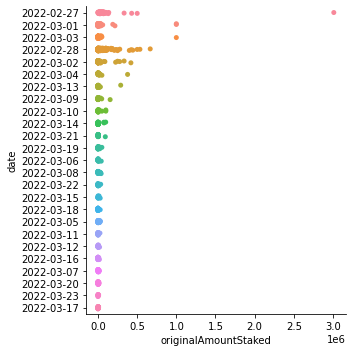

In [ ]:
# Plotting

#sns.jointplot(x=df['original'], y=df['time'], data=df, kind='reg')

#df.hist()

#sns.catplot(x="date", y="original", jitter=False, data=df)
#sns.catplot(x="original", y="date", hue="time", kind="swarm", data=df)

# Grab just the date
df['date'] = df['stakeTime'].str.slice(0,10)


#df['date'] = pd.to_datetime(df['date'])
#df['date'] = df['date'].astype('datetime64[ns]')

# Plot 
sns.catplot(x="originalAmountStaked", y="date",  data=df)



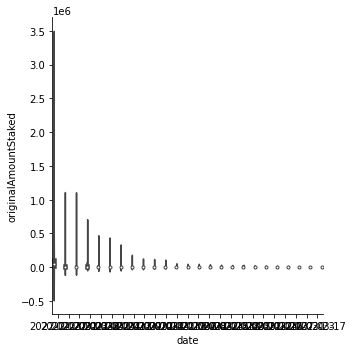

In [ ]:
# violin plot
sns.catplot(x="date", y="originalAmountStaked", hue="date",
            kind="violin", data=df)

In [ ]:
# trimming top 4 

# df_trim = df.iloc[:4 , :]

df_trim = df.drop(df[df.originalAmountStaked == 1000000.000].index)

df_trim.head(4)

,id,name,originalAmountStaked,stakeTime,date
2645,db1f54e1aa84d16756e64bef71362f0d6bc0ee18af25a6...,ergopad Stake Key,3010641.930,2022-02-27 21:30:27.412025,2022-02-27
2458,cb8cf1cf971177767b7429241353576643e8efe88cc0e1...,ergopad Stake Key,666666.000,2022-02-28 02:16:20.097260,2022-02-28
2472,85844a18657774dd430d6e8d7cd90f6ec9b50ef166a8ff...,ergopad Stake Key,535353.320,2022-02-28 01:45:08.015809,2022-02-28
2638,6de153bbeb2cddc08229c36100c2097a23147d43d5bcd5...,ergopad Stake Key,500634.660,2022-02-27 21:59:55.880988,2022-02-27


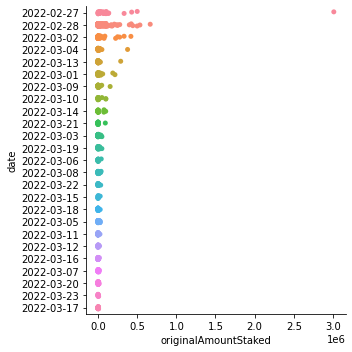

In [ ]:
# Distribution without the top 4 
sns.catplot(x="originalAmountStaked", y="date",  data=df_trim)